In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option("display.max_rows", 999)

In [2]:
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [3]:
year_months = list(uselog_months["年月"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]]
    tmp.rename(columns={"count":"count_0"}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]]
    del tmp_before["年月"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [4]:
# end_dateの1ヶ月前の年月を取得する
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
exit_customer["exit_date"] = None
for i in range(0 ,len(exit_customer)):
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)

exit_customer["年月"] = pd.to_datetime(exit_customer["exit_date"]).dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "年月"], how="left")
print(len(exit_uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 欠損値の除去
exit_uselog = exit_uselog.dropna(subset=["name"])
exit_uselog = exit_uselog.reset_index()
# print(exit_uselog["customer_id"].unique())
exit_uselog.head()

# これで、退会したユーザーのデータを整形できた

,index,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,1.0,オールタイム,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
1,57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,1.0,オールタイム,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
2,110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,1.0,オールタイム,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
3,128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,1.0,オールタイム,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
4,147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,1.0,ナイト,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


In [6]:
# TODO: ノック43
# 継続ユーザーのデータを作成・整形する
conti_customer = customer.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on="customer_id", how="left")
conti_uselog = conti_uselog.dropna(subset=["name"])
conti_uselog.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,0.0,ナイト,6000.0,通常,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,0.0,オールタイム,10500.0,通常,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,0.0,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,0.0,ナイト,6000.0,通常,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0


In [7]:
# 継続顧客の重複を省く処理をする
# データをシャッフルし、顧客の重複を取り除く
# sample()・・・ランダムに一件データ取得する
# sample(frac=n) n*100%の割合でデータを取得する
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
conti_uselog.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201812,TS037146,7,5.0,XX,C02,F,2017-05-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.750000,6.0,7.0,4.0,1.0,2019-04-30,23.0
1,201808,OA786284,8,6.0,XXXXXX,C01,F,2017-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,6.166667,6.5,9.0,2.0,1.0,2019-04-30,21.0
2,201901,HD671982,5,7.0,XXXXX,C01,M,2016-05-01,NaN,CA1,0.0,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,35.0
3,201812,PL479702,5,4.0,XX,C02,F,2017-06-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.666667,5.5,7.0,4.0,1.0,2019-04-30,22.0
4,201808,IK791659,4,8.0,XX,C01,M,2016-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0


In [8]:
# 退会顧客と継続顧客のデータを縦に結合する
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
predict_data.head()

# これで、退会顧客と継続顧客のデータを作成完了

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,index,exit_date
0,201812,TS037146,7,5.0,XX,C02,F,2017-05-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.750000,6.0,7.0,4.0,1.0,2019-04-30,23.0,NaN,NaN
1,201808,OA786284,8,6.0,XXXXXX,C01,F,2017-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,6.166667,6.5,9.0,2.0,1.0,2019-04-30,21.0,NaN,NaN
2,201901,HD671982,5,7.0,XXXXX,C01,M,2016-05-01,NaN,CA1,0.0,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,35.0,NaN,NaN
3,201812,PL479702,5,4.0,XX,C02,F,2017-06-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.666667,5.5,7.0,4.0,1.0,2019-04-30,22.0,NaN,NaN
4,201808,IK791659,4,8.0,XX,C01,M,2016-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0,NaN,NaN


In [9]:
# 入会年月から対象の年月までの期間（月）を求める（periodカラムにデータ追加）
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.iloc[i]["now_date"], predict_data.iloc[i]["start_date"])
    predict_data["period"][i] = delta.years*12 + delta.months
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,index,exit_date,period,now_date
0,201812,TS037146,7,5.0,XX,C02,F,2017-05-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.750000,6.0,7.0,4.0,1.0,2019-04-30,23.0,NaN,NaN,19,2018-12-01
1,201808,OA786284,8,6.0,XXXXXX,C01,F,2017-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,6.166667,6.5,9.0,2.0,1.0,2019-04-30,21.0,NaN,NaN,13,2018-08-01
2,201901,HD671982,5,7.0,XXXXX,C01,M,2016-05-01,NaN,CA1,0.0,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,35.0,NaN,NaN,32,2019-01-01
3,201812,PL479702,5,4.0,XX,C02,F,2017-06-01,NaN,CA1,0.0,デイタイム,7500.0,通常,5.666667,5.5,7.0,4.0,1.0,2019-04-30,22.0,NaN,NaN,18,2018-12-01
4,201808,IK791659,4,8.0,XX,C01,M,2016-07-01,NaN,CA2,0.0,オールタイム,10500.0,入会費半額,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0,NaN,NaN,25,2018-08-01


In [10]:
# 欠損値を削除する
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               253
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
index                2842
exit_date            2842
period                  0
now_date                0
dtype: int64

In [11]:
# end_dateとexit_dateの欠損は仕方ないので、count_1が欠損しているデータを削除する
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2641
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
index                2641
exit_date            2641
period                  0
now_date                0
dtype: int64

In [12]:
# 文字列型の変数を処理できるように整形する

# 目的変数・説明変数に使うカラムだけを抽出する
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,通常,デイタイム,F,5.0,1.0,19,0.0
1,入会費半額,オールタイム,F,6.0,1.0,13,0.0
2,通常,オールタイム,M,7.0,1.0,32,0.0
3,通常,デイタイム,F,4.0,1.0,18,0.0
4,入会費半額,オールタイム,M,8.0,1.0,25,0.0


In [13]:
# ダミー変数化する
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,5.0,1.0,19,0.0,0,0,1,0,1,0,1,0
1,6.0,1.0,13,0.0,1,0,0,1,0,0,1,0
2,7.0,1.0,32,0.0,0,0,1,1,0,0,0,1
3,4.0,1.0,18,0.0,0,0,1,0,1,0,1,0
4,8.0,1.0,25,0.0,1,0,0,1,0,0,0,1


In [14]:
# gender_M, campaign_name_通常, class_name_ナイト, を削除する
# これは、三つのうち二つが0ならば、必然的にもう一つのカラムが1だと判断できるから必要ない

del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,5.0,1.0,19,0.0,0,0,0,1,1
1,6.0,1.0,13,0.0,1,0,1,0,1
2,7.0,1.0,32,0.0,0,0,1,0,0
3,4.0,1.0,18,0.0,0,0,0,1,1
4,8.0,1.0,25,0.0,1,0,1,0,0


In [15]:
# これで、機械学習前のデータ加工が終わった
# ノック47
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data["is_deleted"]==1]
cont = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit)) # exitと同じ量を取得する

X = pd.concat([exit, cont], ignore_index=True)
Y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test) # 実際に、評価データを使ったy(is_deleted)を予測してみる
print(y_test_pred)

[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.

In [16]:
result_test = pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred }) # 実際のデータ（y_test）と、予測データ（y_test_pred）をデータフレームに格納しておく
result_test.head()

,y_test,y_test_pred
1209,0.0,0.0
1287,0.0,0.0
643,1.0,1.0
684,1.0,1.0
1929,0.0,0.0


In [17]:
# 予測モデルの評価を行う
# 作成したモデルの評価を行い、チューニングもしてみる

count_right = len(result_test.loc[result_test["y_test"]==result_test["y_test_pred"]])
all_count = len(result_test)
right_ratio = count_right / all_count
right_ratio * 100

# 正解率が90%くらい

# 学習用データと、評価用データの差が少なければ精度の良いモデルと言える！

90.11406844106465

In [18]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

# 約7%の差分がある
# 学習用データでの精度が97%なので、これはモデルが学習用データに寄りすぎている
# 過学習の状態になっているのでチューニングしてあげる必要がある

# 対応として、決定木の深さを浅くしてあげるなどの対応ができる
# 深さが深いと、より学習データに寄ってしまう

0.9011406844106464
0.9835234474017744


In [19]:
# 決定木の深さを浅くし、モデルを簡易化する

X = pd.concat([exit, cont], ignore_index=True)
Y = X["is_deleted"]
del X["is_deleted"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y)

model = DecisionTreeClassifier(random_state=0, max_depth=3) # 決定木の深さを前回よりも浅くしている
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

#　学習用・評価用が同じくらいのscoreになったのでどちらかに偏っていないモデルが構築できた

0.9182509505703422
0.9144486692015209


In [20]:
importance = pd.DataFrame({"feature_name": X.columns, "coefficient": model.feature_importances_})
importance.sort_values("coefficient", ascending=False)

#この結果から分かるように
# 在籍期間、1ヶ月前の利用回数、定期利用回数が大きく予測に寄与していることがわかる

,feature_name,coefficient
2,period,0.512461
0,count_1,0.351911
1,routine_flg,0.135628
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.000000
5,class_name_オールタイム,0.000000
6,class_name_デイタイム,0.000000
7,gender_F,0.000000


[Text(193.15384615384616, 190.26, 'X[2] <= 12.5\ngini = 0.5\nsamples = 1578\nvalue = [781, 797]'),
 Text(103.01538461538462, 135.9, 'X[0] <= 5.5\ngini = 0.389\nsamples = 978\nvalue = [259, 719]'),
 Text(51.50769230769231, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.069\nsamples = 611\nvalue = [22, 589]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.064\nsamples = 609\nvalue = [20, 589]'),
 Text(154.52307692307693, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.457\nsamples = 367\nvalue = [237, 130]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.048\nsamples = 81\nvalue = [2, 79]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.293\nsamples = 286\nvalue = [235, 51]'),
 Text(283.2923076923077, 135.9, 'X[2] <= 22.5\ngini = 0.226\nsamples = 600\nvalue = [522, 78]'),
 Text(257.53846153846155, 81.53999999999999, 'X[0] <= 4.5\ngini = 0.422\nsamples = 258\nvalue = [180, 78]'),
 T

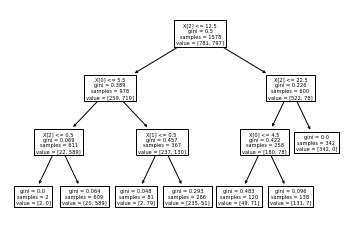

In [34]:
from sklearn import tree
tree.plot_tree(model)


In [40]:
# 実際に予測してみる
# 予測に使うデータをまずは作成する

count_1 = 3
routine_flg = 1
period = 10
campaign_name = "入会費無料"
class_name = "オールタイム"
gender = "M"

if campaign_name == "入会費半額":
    campaign_name_list = [1, 0]
elif campaign_name == "入会費無料":
    campaign_name_list = [0, 1]
elif campaign_name == "通常":
    campaign_name_list = [0, 0]
if class_name == "オールタイム":
    class_name_list = [1, 0]
elif class_name == "デイタイム":
    class_name_list = [0, 1]
elif class_name == "ナイト":
    class_name_list = [0, 0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]



input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

input_data

[3, 1, 10, 0, 1, 1, 0, 0]

In [44]:
# 予測する

print(model.predict([input_data]))
print(model.predict_proba([input_data])) # 確率を求める

# 読み込んだデータでは、退会すると予測
# 96%退会すると予測


[1.]
[[0.03284072 0.96715928]]


In [ ]:
# まとめ

# 今回の場合は、様々な特徴（定期利用回数、キャンペーン種別など）から、0, 1を（退会するかしないか）の分類分けをしたかったので、
# 機械学習のアルゴリズムとして決定木を使った